In [1]:
import tensorflow as tf

#### Loading-"Minist Data Set"
#### Containing sample = 60,000 ,Training Samples = 10,000
#### Tenserflow already contains MINST data set which can be loaded using keras

In [2]:
mnist = tf.keras.datasets.mnist ##Basically this are handwritten characters based on 28*28 sized image of 0 to 9

#### After loading the Dataset,Divide into train and test Dataset

In [3]:
##unpacking the dataset into train test dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
##Just check the group,Now data looks Like
import matplotlib.pyplot as plt

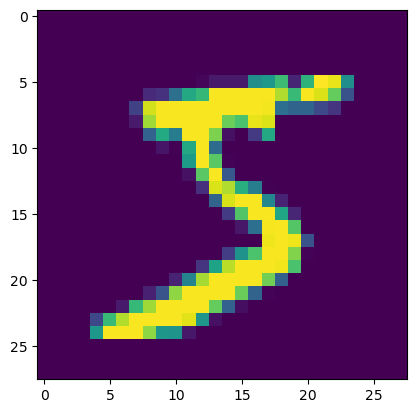

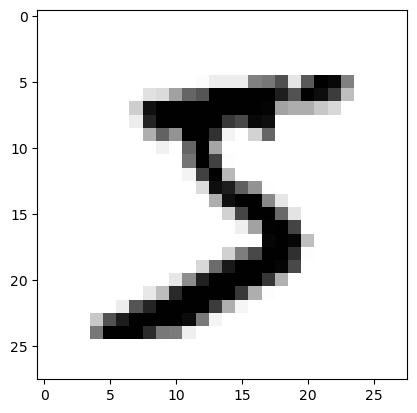

In [6]:
plt.imshow(x_train[0])
plt.show()## in order to execute the graph
##However we dont know whether its color image or binary image
##so inorder to plot it change the comfiguration
plt.imshow(x_train[0],cmap = plt.cm.binary)

#### Checking the value of each pixel
#### Before Normalization

In [7]:
print(x_train[0]) ## Before Normalization

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

#### As image are in Gray level(1 channel ==> 0 to 255),not Colored(RGB)

### Normalizing Data before preprocessing

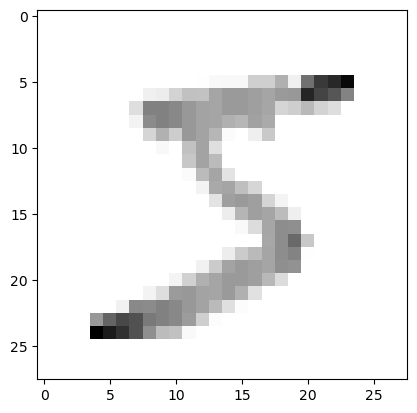

In [8]:

##you might have noticed that, its gray image and all values varies from 0 to 255
##in order to normalize it
x_train = tf.keras.utils.normalize(x_train,axis = 1)
x_test = tf.keras.utils.normalize(x_test,axis = 1)
plt.imshow(x_train[0],cmap = plt.cm.binary)

#### After Normalization

In [9]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
print(y_train[0])    ## just to check that we have Labels inside our network

5


#### Resizing image to make it suitable for apply Convoulational operation

In [11]:
import numpy as np
IMG_SIZE = 28
x_train = np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)  ##increasing one dimension for kernal operation
x_test = np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)    ##increasing one dimension for kernal oprations
print("Testing Sample dimension",x_train.shape)
print("Testing Sample dimension",x_test.shape)


Testing Sample dimension (60000, 28, 28, 1)
Testing Sample dimension (10000, 28, 28, 1)


## Creting a Deep Network
#### Training on 60,000 samples of MNIST handwritten dataset 

In [12]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [13]:
##Creating a neural network now
model = Sequential()

##1st Convolution layer 0 1 2 3 (60000,28,28,1) 28-3+1 = 26*26
model.add(Conv2D(64,(3,3), input_shape = x_train.shape[1:]))
model.add(Activation("relu"))##(relu) activation function -->to make it non linear,<0,remove,>0
model.add(MaxPooling2D(pool_size = (2,2)))##MAXpooling single maximum value od 2*2

##2nd Convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))## activation function -->to make it non linear,<0,remove,>0
model.add(MaxPooling2D(pool_size = (2,2)))##MAXpooling

##3rd Convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))## activation function -->to make it non linear,<0,remove,>0
model.add(MaxPooling2D(pool_size = (2,2)))##MAXpooling

##Fully Connected Layer #1  20*20 = 400
model.add(Flatten()) ##before using fully connected Layer ,need to be flatten so thar 2D to 1D
model.add(Dense(64))
model.add(Activation("relu"))

##Fully Connected Layer #2
model.add(Dense(32))
model.add(Activation("relu"))

##Last Connected Layer ,output must be equal to number of vlasses,10(0-9)
model.add(Dense(10))##this Last dense Layer must be equal to 10
model.add(Activation("softmax"))##activation function is changes to Softmax(class probabilities)

C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
print("Total Training Samples  = ",len(x_train))

Total Training Samples  =  60000


In [16]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer = "adam",metrics = ["accuracy"])

In [17]:
model.fit(x_train,y_train,epochs = 5,validation_split = 0.3) ##Training my model

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 58s 40ms/step - accuracy: 0.7778 - loss: 0.6816 - val_accuracy: 0.9492 - val_loss: 0.1663
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 53s 40ms/step - accuracy: 0.9653 - loss: 0.1189 - val_accuracy: 0.9659 - val_loss: 0.1100
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 52s 40ms/step - accuracy: 0.9743 - loss: 0.0831 - val_accuracy: 0.9771 - val_loss: 0.0736
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 53s 40ms/step - accuracy: 0.9823 - loss: 0.0558 - val_accuracy: 0.9771 - val_loss: 0.0721
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.9853 - loss: 0.0450 - val_accuracy: 0.9809 - val_loss: 0.0627


In [18]:
## Evaluating on testing data set MNIT
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Test Loss on 10,000 test samples",test_loss)
print("Validation Accuracy on 10,000 tes samples",test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9791 - loss: 0.0714
Test Loss on 10,000 test samples 0.060666102916002274
Validation Accuracy on 10,000 tes samples 0.983299970626831


In [20]:
##prediction = new_model.predict([x_test]) ## there is specialized method for efficently saving your model,to name all inputs
##therefore instead of using new model Loaded,for now for predictions I am using simple model
predicions = model.predict([x_test])

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [21]:
print(predicions)##actually there prediction are based on one hot encoding so these are only arrays,containing softmax

[[3.7868060e-07 1.0748456e-05 2.7874789e-06 ... 9.9992347e-01
  9.1732527e-06 4.5849956e-05]
 [2.2023895e-03 2.0322294e-04 9.9502230e-01 ... 2.2918063e-04
  2.4727904e-04 9.0299692e-04]
 [5.3284481e-08 9.9996078e-01 3.7228713e-07 ... 4.3436016e-06
  1.0300243e-05 1.9103402e-06]
 ...
 [2.9650556e-11 6.7185977e-07 5.9199573e-10 ... 1.2781744e-07
  4.5697605e-05 1.1906990e-05]
 [2.7892835e-05 4.5503934e-06 5.9183339e-08 ... 1.5166148e-06
  1.2655079e-03 3.3829577e-04]
 [8.7260396e-06 1.0306359e-07 1.0631734e-07 ... 1.8953303e-10
  1.0440849e-04 8.9639627e-07]]


In [22]:
##In order to understand ,convert the predictions from one hot encoding we need to use numpy for that
print(np.argmax(predicions[0]))##so actually argmax will return the maximum value index and find the value of it

7


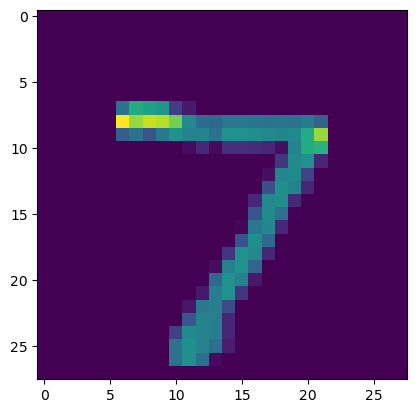

In [23]:
##Now to check that is our answer is true or not
plt.imshow(x_test[0])

In [24]:
##In order to understand ,convert the predictions from one hot encoding we need to use numpy for that
print(np.argmax(predicions[128]))##so actually argmax will return the maximum value index and find the value of it

8


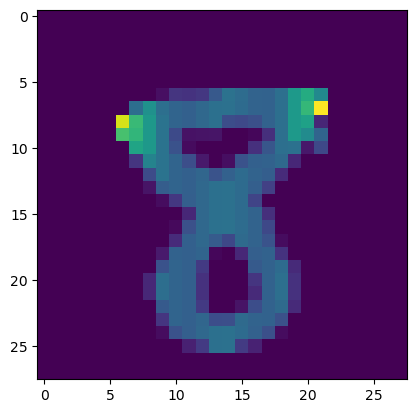

In [25]:
##Now to check that is our answer is true or False
plt.imshow(x_test[128])

In [26]:
import cv2


In [55]:
img = cv2.imread('three.png')

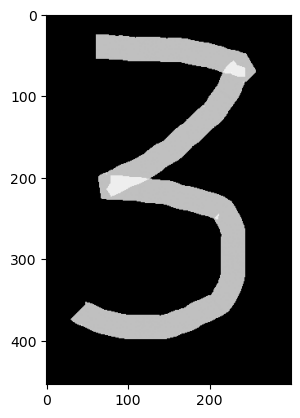

In [56]:
plt.imshow(img)

In [57]:
img.shape

(454, 300, 3)

In [58]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [59]:
gray.shape

(454, 300)

In [60]:
# Resize to 28x28
resized = cv2.resize(gray, (28, 28),  interpolation=cv2.INTER_AREA)

In [61]:
resized.shape

(28, 28)

In [62]:
# Normalize
newimg = tf.keras.utils.normalize(resized,axis = 1) ## 0 to 1 scaling

In [63]:
newimg = np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1)##kernal operation of convoulation layer

In [64]:
newimg.shape

(1, 28, 28, 1)

In [65]:
# Predict
predicions = model.predict(newimg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


In [66]:
print(np.argmax(predicions))

3
